In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.info(),train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass  

(None, None)

In [5]:
train.sample(20)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
619,620,0,2,"Gavey, Mr. Lawrence",male,26.0,0,0,31028,10.5000,NaN,S
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.0000,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
488,489,0,3,"Somerton, Mr. Francis William",male,30.0,0,0,A.5. 18509,8.0500,NaN,S
616,617,0,3,"Danbom, Mr. Ernst Gilbert",male,34.0,1,1,347080,14.4000,NaN,S
318,319,1,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,36928,164.8667,C7,S
222,223,0,3,"Green, Mr. George Henry",male,51.0,0,0,21440,8.0500,NaN,S
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.1250,NaN,Q
200,201,0,3,"Vande Walle, Mr. Nestor Cyriel",male,28.0,0,0,345770,9.5000,NaN,S
174,175,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,C


In [6]:
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

In [7]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [8]:
test.isnull().sum()


PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [9]:
train['Embarked'].fillna('S',inplace=True)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)
df=pd.concat([train,test],sort=True).reset_index(drop=True)
df.shape
df.head()


,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [10]:
df.corr(numeric_only=True)['Age'].abs()


Age            1.000000
Fare           0.178314
Parch          0.150917
PassengerId    0.028814
Pclass         0.408106
SibSp          0.243699
Survived       0.077221
Name: Age, dtype: float64

In [11]:
df_Age_mean=df.groupby(['Sex', 'Pclass']).median(numeric_only=True)['Age']
df_Age_mean

Sex     Pclass
female  1         36.0
        2         28.0
        3         22.0
male    1         42.0
        2         29.5
        3         25.0
Name: Age, dtype: float64

In [12]:
df['Age']=df.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))


In [13]:
df.isnull().sum()

Age              0
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
dtype: int64

In [14]:
df['Title']=df['Name'].str.split(", ",expand=True)[1].str.split(".",expand=True)[0]
df['Title'].value_counts()

Title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [15]:
df['Title'] = df['Title'].replace(['Lady', 'the Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
df['Title'].value_counts()

Title
Mr        757
Miss      264
Mrs       198
Master     61
Rare       29
Name: count, dtype: int64

In [16]:
df['Family_size']=df['SibSp'] + df['Parch'] + 1
df.sample(10)

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_size
766,42.0,C,39.6000,"Brewe, Dr. Arthur Jackson",0,767,1,male,0,0.0,112379,Rare,1
222,51.0,S,8.0500,"Green, Mr. George Henry",0,223,3,male,0,0.0,21440,Mr,1
993,25.0,Q,7.7500,"Foley, Mr. William",0,994,3,male,0,NaN,365235,Mr,1
432,42.0,S,26.0000,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",0,433,2,female,1,1.0,SC/AH 3085,Mrs,2
1114,21.0,S,7.7958,"Karlsson, Mr. Einar Gervasius",0,1115,3,male,0,NaN,350053,Mr,1
550,17.0,C,110.8833,"Thayer, Mr. John Borland Jr",2,551,1,male,0,1.0,17421,Mr,3
399,28.0,S,12.6500,"Trout, Mrs. William H (Jessie L)",0,400,2,female,0,1.0,240929,Mrs,1
921,50.0,S,26.0000,"Louch, Mr. Charles Alexander",0,922,2,male,1,NaN,SC/AH 3085,Mr,2
414,44.0,S,7.9250,"Sundman, Mr. Johan Julian",0,415,3,male,0,1.0,STON/O 2. 3101269,Mr,1
104,37.0,S,7.9250,"Gustafsson, Mr. Anders Vilhelm",0,105,3,male,2,0.0,3101276,Mr,3


In [17]:
df.drop(columns=['Name','Parch','SibSp','Ticket'],inplace=True)

In [18]:
df.sample(10)

,Age,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Title,Family_size
72,21.0,S,73.5000,73,2,male,0.0,Mr,1
1029,23.0,S,8.0500,1030,3,female,NaN,Miss,1
70,32.0,S,10.5000,71,2,male,0.0,Mr,1
518,36.0,S,26.0000,519,2,female,1.0,Mrs,2
373,22.0,C,135.6333,374,1,male,0.0,Mr,1
118,24.0,C,247.5208,119,1,male,0.0,Mr,2
1163,26.0,C,136.7792,1164,1,female,NaN,Mrs,2
975,29.5,Q,10.7083,976,2,male,NaN,Mr,1
515,47.0,S,34.0208,516,1,male,0.0,Mr,1
380,42.0,C,227.5250,381,1,female,1.0,Miss,1


In [19]:
def family_size(number):
    if number==1:
        return "Alone"
    elif number>1 and number <5:
        return "Small"
    else:
        return "Large"
df['Family_size']=df['Family_size'].apply(family_size)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1309 non-null   float64
 1   Embarked     1309 non-null   object 
 2   Fare         1309 non-null   float64
 3   PassengerId  1309 non-null   int64  
 4   Pclass       1309 non-null   int64  
 5   Sex          1309 non-null   object 
 6   Survived     891 non-null    float64
 7   Title        1309 non-null   object 
 8   Family_size  1309 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 92.2+ KB


In [20]:
df['Age'] = df['Age'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1309 non-null   int64  
 1   Embarked     1309 non-null   object 
 2   Fare         1309 non-null   float64
 3   PassengerId  1309 non-null   int64  
 4   Pclass       1309 non-null   int64  
 5   Sex          1309 non-null   object 
 6   Survived     891 non-null    float64
 7   Title        1309 non-null   object 
 8   Family_size  1309 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 92.2+ KB


In [21]:
col=['Embarked','Pclass','Sex','Title','Family_size']
for i in col:
    print('Survival Correlation by:', i)
    df2=df.groupby(i)['Survived'].mean().reset_index()
    print(df2)
    print('-'*10, '\n')

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correlation by: Title
    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826
---------- 

Survival Correlation by: Family_size
  Family_size  Survived
0       Alone  0.303538
1       Large  0.161290
2       Small  0.578767
---------- 



In [22]:
df.head()

,Age,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Title,Family_size
0,22,S,7.2500,1,3,male,0.0,Mr,Small
1,38,C,71.2833,2,1,female,1.0,Mrs,Small
2,26,S,7.9250,3,3,female,1.0,Miss,Alone
3,35,S,53.1000,4,1,female,1.0,Mrs,Small
4,35,S,8.0500,5,3,male,0.0,Mr,Alone


Feature engineering

In [23]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn import ensemble
from sklearn import gaussian_process
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import svm
from sklearn import tree
from sklearn import discriminant_analysis
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
df.head()

,Age,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Title,Family_size
0,22,S,7.2500,1,3,male,0.0,Mr,Small
1,38,C,71.2833,2,1,female,1.0,Mrs,Small
2,26,S,7.9250,3,3,female,1.0,Miss,Alone
3,35,S,53.1000,4,1,female,1.0,Mrs,Small
4,35,S,8.0500,5,3,male,0.0,Mr,Alone


In [24]:
train = df.loc[:890]
test = df.loc[891:]

In [25]:
test.head()

,Age,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Title,Family_size
891,34,Q,7.8292,892,3,male,NaN,Mr,Alone
892,47,S,7.0000,893,3,female,NaN,Mrs,Small
893,62,Q,9.6875,894,2,male,NaN,Mr,Alone
894,27,S,8.6625,895,3,male,NaN,Mr,Alone
895,22,S,12.2875,896,3,female,NaN,Mrs,Small


In [26]:
train.head()

,Age,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Title,Family_size
0,22,S,7.2500,1,3,male,0.0,Mr,Small
1,38,C,71.2833,2,1,female,1.0,Mrs,Small
2,26,S,7.9250,3,3,female,1.0,Miss,Alone
3,35,S,53.1000,4,1,female,1.0,Mrs,Small
4,35,S,8.0500,5,3,male,0.0,Mr,Alone


In [27]:
test.drop(columns=['Survived'],inplace=True)
train['Survived'] = train['Survived'].astype('int64')
train.head()


,Age,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Title,Family_size
0,22,S,7.2500,1,3,male,0,Mr,Small
1,38,C,71.2833,2,1,female,1,Mrs,Small
2,26,S,7.9250,3,3,female,1,Miss,Alone
3,35,S,53.1000,4,1,female,1,Mrs,Small
4,35,S,8.0500,5,3,male,0,Mr,Alone


In [28]:
train.shape,test.shape


((891, 9), (418, 8))

In [29]:
train = train.drop("PassengerId", axis=1)



In [30]:
y_train = train["Survived"]
X_train = train.drop("Survived", axis=1)

X_train.head()

,Age,Embarked,Fare,Pclass,Sex,Title,Family_size
0,22,S,7.2500,3,male,Mr,Small
1,38,C,71.2833,1,female,Mrs,Small
2,26,S,7.9250,3,female,Miss,Alone
3,35,S,53.1000,1,female,Mrs,Small
4,35,S,8.0500,3,male,Mr,Alone


In [31]:
X_train.shape,y_train.shape

((891, 7), (891,))

In [32]:
num_cat_tranformation=ColumnTransformer([
                                    ('scaling',MinMaxScaler(),[0,2]),
                                    ('onehotencolding1',OneHotEncoder(),[1,3]),
                                    ('ordinal',OrdinalEncoder(),[4]),
                                    ('onehotencolding2',OneHotEncoder(),[5,6])
                                    ],remainder='passthrough')

In [33]:
bins=ColumnTransformer([
                        ('Kbins',KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile'),[0,2]),
                        ],remainder='passthrough')

In [34]:
from sklearn import set_config
set_config(display='diagram')

In [35]:
X_train.head()

,Age,Embarked,Fare,Pclass,Sex,Title,Family_size
0,22,S,7.2500,3,male,Mr,Small
1,38,C,71.2833,1,female,Mrs,Small
2,26,S,7.9250,3,female,Miss,Alone
3,35,S,53.1000,1,female,Mrs,Small
4,35,S,8.0500,3,male,Mr,Alone


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_train,y_train,test_size=0.2)

In [37]:
def create_pipeline(algo):
    return Pipeline([
        ('num_cat_transformation', num_cat_tranformation),
        ('bins', bins),
        ('classifier', algo)
    ])

In [38]:
algorithms=[
    ensemble.RandomForestClassifier(),


    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
]

In [39]:
print(X_train.columns)


Index(['Age', 'Embarked', 'Fare', 'Pclass', 'Sex', 'Title', 'Family_size'], dtype='object')


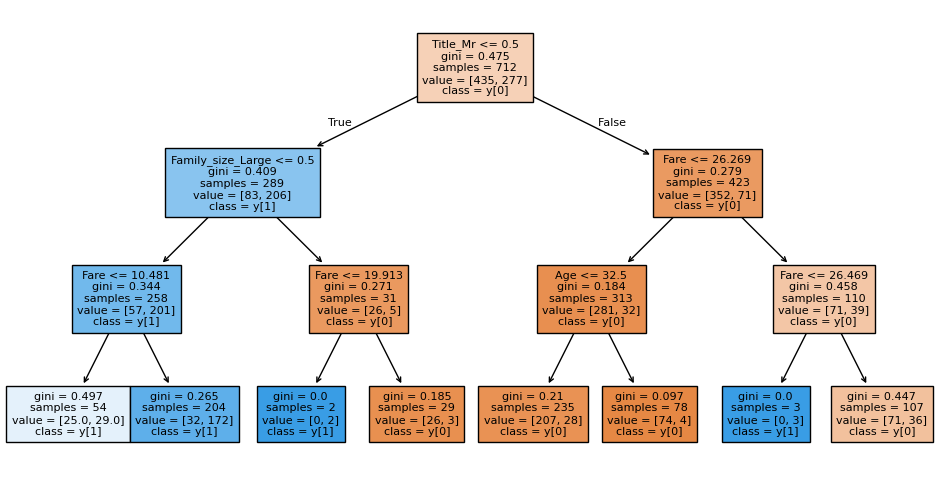

In [40]:
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.preprocessing import OneHotEncoder
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn import tree

    # Columns that need encoding
    categorical_cols = ['Embarked', 'Sex', 'Title', 'Family_size']

    # One-Hot Encoding
    X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)

    # Train a single Decision Tree with a limited depth
    dt_model = DecisionTreeClassifier(random_state=42, max_depth=3)  # Adjust depth as needed
    dt_model.fit(X_train, y_train)

    # Visualize the decision tree
    plt.figure(figsize=(12, 6))  # Adjust figure size for readability
    tree.plot_tree(dt_model, filled=True, feature_names=X_train.columns, class_names=True, fontsize=8)  # Reduce font size
    plt.show()


In [41]:
# Print accuracy
accuracy = dt_model.score(X_train, y_train)
print(f"Training Accuracy: {accuracy:.4f}")


Training Accuracy: 0.8202
